# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

#### Обработка оставшися ошибок в датафрэйме.

In [ ]:
for i in data. columns. tolist(): #проходим циклом по списку названий колонок датафрейма.
  print (data[i].value_counts()) #выводим количество уникальных значений каждой колонки.

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64
1572.328285      1067
1555.947387       497
365286.622650     384
2689.137274       145
520.848083          2
                 ... 
985.798488          1
357.207058          1
3951.652030         1
847.043824          1
1636.419775         1
Name: days_employed, Length: 19241, dtype: int64
35    613
40    601
41    601
34    595
38    594
42    591
33    577
39    571
31    555
36    552
29    542
44    541
48    534
30    533
37    530
43    509
50    508
49    505
32    505
28    501
45    493
27    490
52    483
56    478
47    477
54    473
46    466
53    457
58    454
57    453
51    444
55    441
59    440
26    406
60    373
25    356
61    352
62    347
63    268
24    263
64    258
23    250
65    193
22    183
66    182
67    167
21    110
0     100
68     99
69     83
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
сред

Найдены следующие ошибки в данных:
-в колонке 'gender' - 'XNA'
-в колонке 'purpose' - 'ремонт жилью'


In [ ]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'F' # исправим значение пола на 'F'-по-умолчанию
#количество женщин в данных больше, чем мужчин.
data.loc[data['gender'] == 'XNA']['gender'].count()

0

In [ ]:
data.loc[data['purpose'] == 'ремонт жилью', 'purpose'] = 'ремонт жилья' # исправим опечатку в purpose
data.loc[data['purpose'] == 'ремонт жилью']['purpose'].count() # проверим, что всё исправлено.

0

В предоставленных данных имеются артефакты. Следует предупредить тех, кто делал выгрузку о них, хоть и с учётом того,что их количество не существенно и их наличие не сильно отразится на результатах исследования. Тем не менее, для большей точности, артефакты были устранены.

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Проведём категоризацию данных о количестве детей заёмщиков.**

In [ ]:
def children_count_category (child):
  if child==1:
    return '1 ребёнок'
  elif child==2:
    return '2 ребëнка'
  elif child==0:
    return 'бездетные'
  return 'много детей'

In [ ]:
#применим функцию 'children_count_category' к столбцу 'children'
data['children_category']=data ['children'].apply(children_count_category)
#посмотрим результат.
print (data['children_category'].value_counts())

бездетные      14091
1 ребёнок       4808
2 ребëнка       2052
много детей      380
Name: children_category, dtype: int64


In [ ]:
def proportion_stat(pdSerises):
    return str(round((pdSerises.sum() / pdSerises.count()) * 100, 2)) + '%'

# построим сводную таблицу.
data_pivot = data.pivot_table(index=['children_category'], values=['debt'],\
                              aggfunc=['sum', 'count', proportion_stat])
# сортируем.
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
children_category,,,
бездетные,1063,14091,7.54%
много детей,31,380,8.16%
1 ребёнок,444,4808,9.23%
2 ребëнка,194,2052,9.45%


<AxesSubplot:xlabel='children_category', ylabel='debt'>

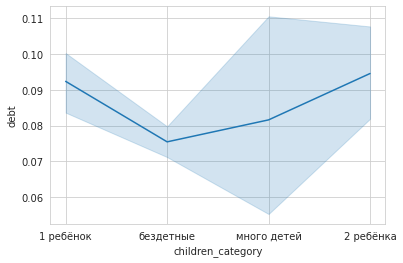

In [ ]:
sns.set_style("whitegrid") #загрузим стиль графика
sns.lineplot(data=data, x="children_category", y="debt") #постороим график для наглядности.

**Вывод:**
У бездетных клиентов, вероятность возникновения задолженности ниже,чем у клиентов ,у которых есть дети. Задолженность у бездетных и многодетных почти на одинаковом уровне. В остальных случаях вероятность просрочки выше,но разница на самом деле не представляется существенной, учитывая величину задолженности среди этих групп.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
 #построим сводную таблицу для наглядности
data_pivot = data.pivot_table(index=['family_status'], values=["debt"], aggfunc=['sum', 'count', proportion_stat])
# сортируем
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
family_status,,,
вдовец / вдова,63,951,6.62%
в разводе,84,1189,7.06%
женат / замужем,927,12261,7.56%
гражданский брак,385,4134,9.31%
Не женат / не замужем,273,2796,9.76%


<AxesSubplot:xlabel='debt', ylabel='family_status'>

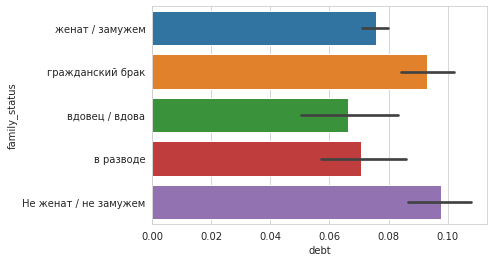

In [ ]:
family_frame=data.loc[:, ['family_status', 'debt']]
sns.barplot(data=family_frame,x='debt', y='family_status')

**Вывод:**
Проанализировав данные можно увидеть,что вдовец/вдова и люди в разводе имеют наименьший риск просрочки. Вероятно, это связно с тем, что кредит берется более осознанно в силу возраста и жизненного опыта. Самая "рисковая" категория - неженатые и состоящие в гражданском браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
# построим сводную таблицу.
data_pivot = data.pivot_table(index=['total_income_category'], values=["debt"], aggfunc=['sum', 'count', proportion_stat])
# сортируем.
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
total_income_category,,,
D,21,349,6.02%
B,354,5014,7.06%
A,2,25,8.0%
C,1353,15921,8.5%
E,2,22,9.09%


  Сводная таблица показывает,что менее всего закредитован средний класс. Если же посмотреть на количество данных по категориям А-самые обеспеченные клиенты,Е-самые низкодоходные клиенты и D, то можно прийти к выводу,что данных недостаточно и выводы не верны. Для получения более однозначных выводов посмотрим на распределение показателя закредитованности по группам самих заёмщиков.

In [ ]:
# построим сводную таблицу.
data_pivot = data.pivot_table(index=['income_type'], values=["debt"], aggfunc=['sum', 'count', proportion_stat])
# сортируем.
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
income_type,,,
предприниматель,0,2,0.0%
студент,0,1,0.0%
в декрете,1,1,100.0%
пенсионер,216,3812,5.67%
госслужащий,86,1451,5.93%
безработный,1,2,50.0%
компаньон,374,5047,7.41%
сотрудник,1054,11015,9.57%


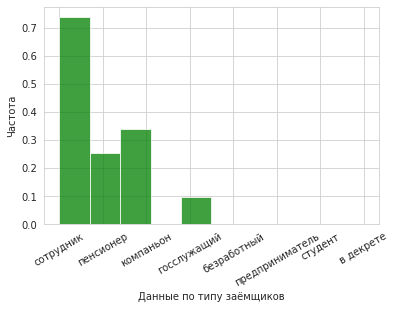

In [ ]:
data.income_type.hist(bins=10,density=True, facecolor='g', alpha=0.75)
plt.xlabel('Данные по типу заёмщиков')
plt.xticks(rotation=30)
plt.ylabel('Частота')
plt.show()

   Рассматривая график выше можно выделить 2 основные группы заёмщиков. Далее проанализируем их,убрав остальные группы в качестве шумового эффекта данных.

In [ ]:
#сделаем отбор данных датафрэйма по типу заёмщиков - сотрудник и компаньон.
data_for_two_group_income_type=data.loc[(data['income_type']=='компаньон')|(data['income_type']=='сотрудник')]

In [ ]:
#по той же переменной сделаем отбор данных датафрэйма по типу категории доходов В и С.
data_for_two_group_income_type=data_for_two_group_income_type.loc[(data['total_income_category']=='B')|(data['total_income_category']=='C')]

In [ ]:
# построим сводную таблицу.
data_pivot = data_for_two_group_income_type.pivot_table(index=['total_income_category'], values=["debt"], aggfunc=['sum', 'count', proportion_stat])
# сортируем.
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
total_income_category,,,
B,305,4093,7.45%
C,1108,11777,9.41%


 С учётом полученных данных выше по 2 наибольшим группа заёмщиков и с учетом 2 наибольших групп по категориям дохода.Можно сделать вывод о том,что наиболее закредитована категория С в отобранных группах (компаньон и сотрудник).В то же время группа  с более высокими доходами (В) менее закредитована. Разница между В и С составляет 1,96 % в абсолютном выражении и 20,83% в относительном.

<AxesSubplot:xlabel='debt', ylabel='total_income_category'>

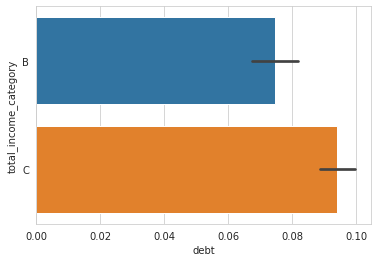

In [ ]:
sns.barplot(data=data_for_two_group_income_type,x='debt', y='total_income_category')

In [ ]:
#вспомним,какая у нас медиана.
data['total_income'].median()

142594.0

**Вывод:**
Благодаря анализу мы пришли к выводу,что данных недостаточно для полноценного анализа зависимости дохода и возможностью возврата кредита в срок. Были выделены среди наибольших групп заемщиков (компаньон и сотрудник) наибольшие по численности группы с дохами входящими в категории В (200001–1000000) и С (50001–200000).Группа заемщиков с категорией дохода С находится в зоне риска. Так же надо обратить внимание,что эти группы попадают в "водораздел" цифрой медианы.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
 #построим сводную таблицу.
data_pivot = data.pivot_table(index=['purpose_category'], values=["debt"], aggfunc=['sum', 'count', proportion_stat])
# отсортируем для наглядности.
data_pivot = data_pivot.sort_values(by=('proportion_stat', 'debt'))
data_pivot

,sum,count,proportion_stat
,debt,debt,debt
purpose_category,,,
операции с недвижимостью,780,10751,7.26%
проведение свадьбы,183,2313,7.91%
получение образования,369,3988,9.25%
операции с автомобилем,400,4279,9.35%


<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

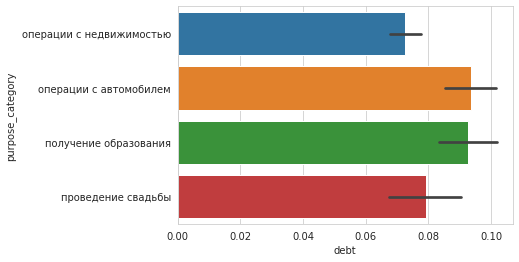

In [ ]:
sns.barplot(data=data,x='debt', y='purpose_category')

**Вывод:**
 Наименее рисковыми кредитными операциями для банка являются кредиты связанные с недвижимостью,в то же время кредитные операции связанные с автомобилями являются наиболее рискованными. Хотя абсолютная разница не такая большая, относительно друг друга она составляет порядка 22,35%, что уже существенно.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*
  Наличие пропусков в данных о доходе и стажу вероятно связаны с отсутствие данных от самих заёмщиков. Клиенты могли не указать доход и стаж,т.к. отсутвует постоянный доход.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*
  Медиана даёт более точные данные и с её помощью правильнее интерпретировать статистику,т.к. при использовании среднего значения,можно прийти к неправильным аналитических решениям из-за большого разброса минимального и максимального значения выборки.

### Шаг 4: общий вывод.

## **Общий вывод.**


Наиболее благонадёжный заёмщик - это человек без детей, состоящий или состоявший в официальных отношениях, имеющий уровень дохода выше среднего и берущий кредит на недвижимость.

Разница между просроченными выплатами по каждой из категорий примерно одинакова. Диапазон показателей составляет от 7% до 9%. В остальном разница в абсолютных цифрах не такая большая. В относительных разница составляет в среднем 2%, что означает разницу в вероятности просрочки платежа на 20% между минимальным значением показателя закредитованности и максимальным.

Рассмотрим более детально по группам:

    Влияние наличия детей на вероятность просрочки платежа
    По наличию детей:
        Бездетные - 7.54%
        Много детей - 8.16%
        1 ребёнок - 9.23%
        2 ребёнка - 9.45%
    Абсолютная разница между минимальным и максимальным значением - 1.91%
    Относительная разница между минимальным и максимальным значением - 20.21%
    Влияние семейного положения на вероятность просрочки платежа:
    По семейному положению:
        вдовец / вдова - 6.62%
        в разводе - 7.06%
        женат / замужем - 7.56%
        гражданский брак - 9.31%
        не женат / не замужем - 9.76%
    Абсолютная разница между минимальным и максимальным значением - 3.14%
    Относительная разница между минимальным и максимальным значением - 32,17%
    Влияние уровня дохода на просрочку платежа:
    По уровню дохода:
    D (30 001–5 000)	-6.02%
    B (200 001–1 000 000)	-7.06%
    A (1 000 001 и выше) 	-8.0%
    C (50 001–200 000) 	-8.5%
    E (0–30 000)	-9.09%
    Абсолютная разница между минимальным и максимальным значением - 2.66%
    Относительная разница между минимальным и максимальным значением - 33.77%
    По уровню дохода (разбивка с учётом 2 групп заёмщиков - компаньон и сотрудник и 2 категорий дохода В и С):
    B (200 001–1 000 000) 	-7.45%
    C (50 001–200 000)	-9.41%
    Абсолютная разница между минимальным и максимальным значением - 1.96%
    Относительная разница между минимальным и максимальным значением - 20.82%
    Влияние цели кредита на вероятность возврата кредита в срок:
    По цели кредита :
        недвижимость - 7.26%
        свадьба - 7.91%
        образование - 9.25%
        автомобиль - 9.35%
    Абсолютная разница между минимальным и максимальным значением - 2.09%
    Относительная разница между минимальным и максимальным значением - 22.35%
   
    При первоначальном анализе данных по категориям дохода (А,В,С,D,E) выявлено,что данных по категориях А и Е крайне мало,что может повлиять на правильную интерпритацию выводов.Поэтому было выделено 2 наибольших группы по типу заёмщиков для более детального анализа,а в них выделены 2 категории дохода В и С,т.к остальные категории были слишком малочислены и являлись шумом.


    Подводя итоги можно сказать,что несмотря на аналогичный в процентном отношении разброс значений, наибольшее влияние на вероятность просрочки показывает именно семейное положение. Наименьшее влияние оказывают цели кредита и наличие детей.Так же,что удивительно,невозможно выявить связи между доходом и возможностью возврата кредита,т.к. данных недостаточно.Можно только подсказать клиенту,что предпочтительней выдавать кредит заёмщику с доходом выше 200 000.
